In [4]:
# from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input,Reshape,Flatten,Dense,Dropout,MaxPooling2D
from tensorflow.keras.layers import BatchNormalization,Activation,LeakyReLU,UpSampling2D,Conv2D
from keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt

In [2]:
!git clone https://github.com/taehojo/data-ch20.git


Cloning into 'data-ch20'...
remote: Enumerating objects: 265, done.
remote: Counting objects: 100% (265/265), done.
remote: Compressing objects: 100% (265/265), done.
remote: Total 265 (delta 0), reused 265 (delta 0), pack-reused 0
Receiving objects: 100% (265/265), 1.86 MiB | 5.14 MiB/s, done.


In [6]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 horizontal_flip=True,
                                 width_shift_range=0.1,
                                 height_shift_range=0.1)
train_generator=train_datagen.flow_from_directory('./data-ch20/train',
                                                  target_size=(150,150),
                                                  batch_size=5,
                                                  class_mode='binary')
test_datagen=ImageDataGenerator(rescale=1./255)
test_generator=test_datagen.flow_from_directory('./data-ch20/test',
                                                target_size=(150,150),
                                                batch_size=5,
                                                class_mode='binary')

Found 160 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [8]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 activation_1 (Activation)   (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_2 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                  

In [10]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.Adam(learning_rate=0.0002),metrics=['accuracy'])
early_stopping_callback=EarlyStopping(monitor='val_loss',patience=5)

In [11]:
history=model.fit(train_generator,epochs=100,validation_data=test_generator,validation_steps=10,callbacks=[early_stopping_callback])

Epoch 1/100
32/32 [==============================] - 7s 198ms/step - loss: 0.6952 - accuracy: 0.5000 - val_loss: 0.6941 - val_accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 7s 215ms/step - loss: 0.6916 - accuracy: 0.5437 - val_loss: 0.6908 - val_accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 6s 196ms/step - loss: 0.6765 - accuracy: 0.5688 - val_loss: 0.6742 - val_accuracy: 0.5800
Epoch 4/100
32/32 [==============================] - 6s 182ms/step - loss: 0.6838 - accuracy: 0.5562 - val_loss: 0.6719 - val_accuracy: 0.6000
Epoch 5/100
32/32 [==============================] - 6s 187ms/step - loss: 0.6789 - accuracy: 0.5500 - val_loss: 0.6687 - val_accuracy: 0.5400
Epoch 6/100
32/32 [==============================] - 7s 233ms/step - loss: 0.6552 - accuracy: 0.6562 - val_loss: 0.6006 - val_accuracy: 0.7600
Epoch 7/100
32/32 [==============================] - 6s 196ms/step - loss: 0.6187 - accuracy: 0.7125 - val_loss: 0.6115 - val_accuracy: 0.5800

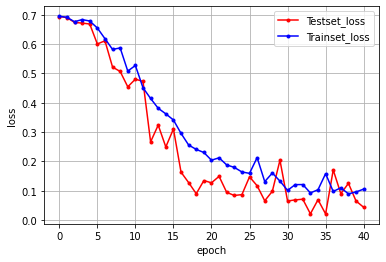

In [12]:
y_vloss=history.history['val_loss']
y_loss=history.history['loss']
x_len=np.arange(len(y_loss))

plt.plot(x_len,y_vloss,marker='.',c='red',label='Testset_loss')
plt.plot(x_len,y_loss,marker='.',c='blue',label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()